In [91]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.lines as mlines

In [2]:
labels = pd.read_csv('./dataset/new/labels.csv')
labels_ag= labels["Aggregated"]
labels_ag

0         0
1         0
2         0
3         0
4         0
         ..
119995    0
119996    0
119997    0
119998    0
119999    0
Name: Aggregated, Length: 120000, dtype: int64

# How are the class labels distributed?

In [3]:
number_labels = []
for i in range(7):
    number_labels.append(labels_ag[labels_ag==i].shape[0]/labels_ag.shape[0])
number_labels

[0.7113166666666667,
 0.04860833333333334,
 0.07461666666666666,
 0.06831666666666666,
 0.019366666666666667,
 0.04259166666666667,
 0.03518333333333333]

<BarContainer object of 7 artists>

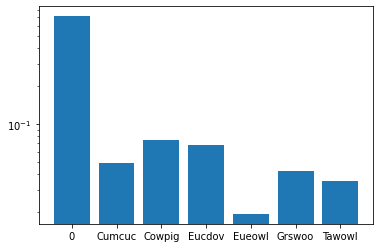

In [4]:
plt.bar(["0", "Cumcuc", "Cowpig", "Eucdov", "Eueowl", "Grswoo", "Tawowl"],number_labels, log=True )

# Are the classes unbalanced, and how much?

How much unbalanced?
Really unbalanced if we include 0 (other) class, minor class is only 2 %, while we have 7 classes -> balanced would be 14%.
If exclude still unbalanced, but better, minor class is roughly 6.67% while we have 6 classes, so balanced would be 16.67%.

In [17]:
# recalculate % of birds without column 'no label'
n_l = np.array(number_labels)
n_l = n_l/n_l[1:].sum()
n_l

array([2.46400323, 0.16837942, 0.25847237, 0.23664915, 0.0670862 ,
       0.14753767, 0.12187518])

In [144]:
0.06708*4

0.26832

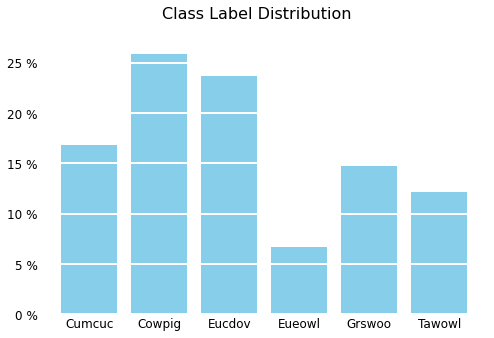

In [138]:
fig, axs = plt.subplots(figsize=(8,5))

fig.suptitle("Class Label Distribution", fontsize=16)
axs.set_ylim([0,0.27])
axs.bar(["Cumcuc", "Cowpig", "Eucdov", "Eueowl", "Grswoo", "Tawowl"], n_l[1:], color="skyblue")
axs.spines['left'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.set_yticks([])
axs.tick_params(axis='both', which='major', labelsize=12, length=0)
axs.spines["top"].set_visible(False)
axs.spines["bottom"].set_visible(False)
axs.set_yticks(ticks=[0, 0.05, 0.1, 0.15, 0.2, 0.25],labels=["0 %","5 %","10 %","15 %","20 %", "25 %"])
axs.grid(which='major',axis='y',color='white', linestyle='-', linewidth=2)

plt.savefig("Class_Label_Distribution")

Text(0, 0.5, '%')

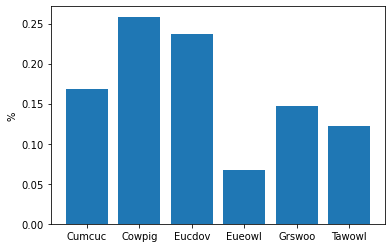

In [18]:
plt.bar(["Cumcuc", "Cowpig", "Eucdov", "Eueowl", "Grswoo", "Tawowl"], n_l[1:])
plt.ylabel("%")

# What is the average duration of a species calls?

In [42]:
# index 0=cumcuc, 1=cowpig, 2=eucdov, 3=eueowl, 4=grswoo, 5=tawowl 
species_call = [[], [], [], [], [], []]

for s in range(6):
    counter = 0
    for i in range(20000):
        if labels_ag.iloc[20000*s+i] == s+1:
            counter +=1
        else:
            if counter > 0:
                species_call[s].append(counter)
            counter = 0
#species_call

In [43]:
average_call = []
for i in range(6):
    average_call.append(round(np.array(species_call[i]).mean(),2))
average_call

[3.46, 8.02, 5.43, 3.43, 2.75, 4.02]

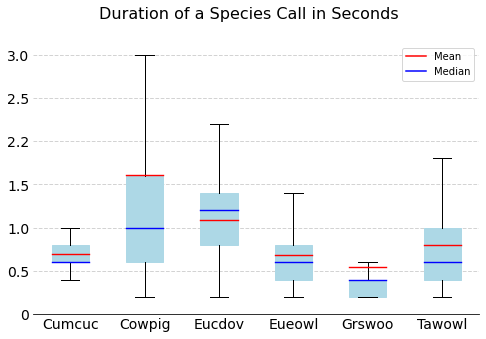

In [145]:
fig, axs = plt.subplots(figsize=(8,5))

fig.suptitle("Duration of a Species Call in Seconds", fontsize=16)
axs.boxplot([np.array(species_call[i])*0.2 for i in range(6)],showfliers=False, meanline=True, showmeans=True, boxprops=dict(facecolor="lightblue", color="lightblue"),patch_artist=True, medianprops=dict(color="blue", linewidth=1.4), meanprops=dict(color="red", linestyle="-",linewidth=1.4))

axs.grid(which='major',axis='y',color='lightgrey', linestyle='--', linewidth=1)

axs.spines['left'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.set_yticks([])
axs.tick_params(axis='both', which='major', labelsize=14, length=0)
axs.spines["top"].set_visible(False)
#axs.spines["bottom"]
axs.set_xticks(ticks=[1,2,3,4,5,6],labels=["Cumcuc", "Cowpig", "Eucdov", "Eueowl", "Grswoo", "Tawowl"])
axs.set_yticks(ticks=[0, 0.5, 1, 1.5, 2, 2.5,3],labels=["0","0.5","1.0","1.5","2.2", "2.5", "3.0"])

#axs.set_ylabel("Seconds",fontsize=14)

red_patch = mlines.Line2D([], [], color='red', label='Mean')
blue_patch = mlines.Line2D([], [], color='blue', label='Median')
axs.legend(handles=[red_patch, blue_patch])

plt.savefig("Duration_Species_Call")
plt.show()

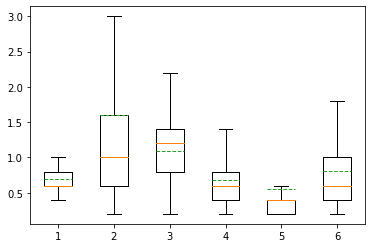

In [46]:
plt.boxplot([np.array(species_call[i])*0.2 for i in range(6)],showfliers=False, meanline=True, showmeans=True)
plt.show()

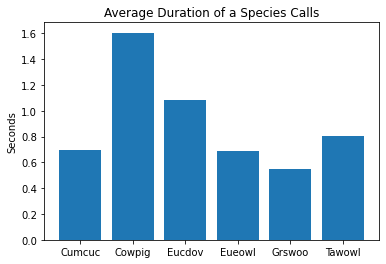

In [80]:
plt.bar(["Cumcuc", "Cowpig", "Eucdov", "Eueowl", "Grswoo", "Tawowl"], np.array(average_call)*0.2)
plt.ylabel("Seconds")
plt.title("Average Duration of a Species Calls")
plt.show()

# Are there large inter-/intra-class variations?

In [105]:
# variation for bird_call_length per species
var_call = []
for i in range(6):
    var_call.append(round(np.array(species_call[i]).var(),2))
var_call

[1.05, 119.33, 13.84, 7.19, 49.54, 8.66]

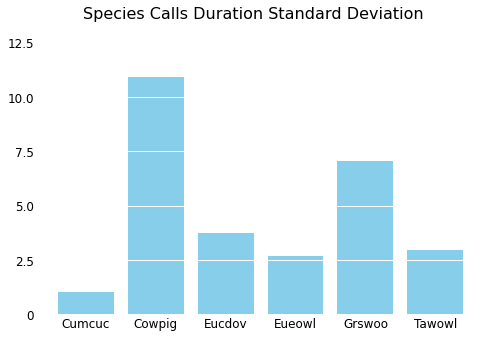

In [146]:
fig, axs = plt.subplots(figsize=(8,5))

fig.suptitle("Species Calls Duration Standard Deviation", fontsize=16)
axs.set_ylim([0,12.5])
axs.bar(["Cumcuc", "Cowpig", "Eucdov", "Eueowl", "Grswoo", "Tawowl"], np.array(var_call)**0.5, color="skyblue")
axs.spines['left'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.set_yticks([])
axs.tick_params(axis='both', which='major', labelsize=12, length=0)
axs.spines["top"].set_visible(False)
axs.spines["bottom"].set_visible(False)
#axs.set_yticks(ticks=[0,  20, 40, 60, 80, 100, 120],labels=["0","20","40","60","80", "100", "120"])
axs.set_yticks(ticks=[0, 2.5, 5, 7.5, 10, 12.5],labels=["0","2.5","5.0","7.5","10.0", "12.5"])
axs.grid(which='major',axis='y',color='white', linestyle='-', linewidth=1)
plt.savefig("Species_Calls_Std")
plt.show()

<BarContainer object of 6 artists>

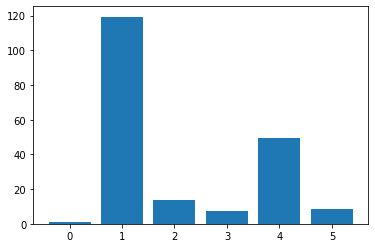

In [102]:
plt.bar([0,1,2,3,4,5], var_call)

In [116]:
np.array(species_call[1]).max()

95

In [ ]:
np.array(var_call).var()

In [121]:
np.array(average_call).std()/5

0.35376718646904237

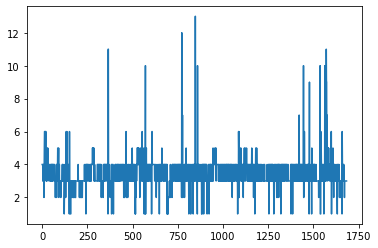

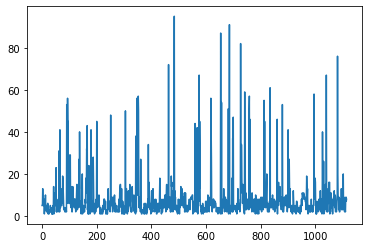

In [107]:
plt.plot(species_call[0])
plt.show()
plt.plot(species_call[1])
plt.show()

In [93]:
g = pd.read_csv('./dataset/new/grswoo_labels.csv')

In [94]:
g

,Position,Aggregated,1,2,3,4,5,6,7
0,0,0,5,0,5,0.0,0.0,0.0,NaN
1,1,0,5,0,5,0.0,0.0,5.0,NaN
2,2,0,5,0,5,0.0,0.0,5.0,NaN
3,3,5,5,5,5,0.0,0.0,5.0,NaN
4,4,0,5,0,0,0.0,0.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...
19995,95,0,0,0,0,0.0,0.0,0.0,NaN
19996,96,0,0,0,0,0.0,0.0,0.0,NaN
19997,97,0,0,0,0,0.0,0.0,0.0,NaN
19998,98,0,0,0,0,0.0,0.0,0.0,NaN


In [96]:
l = []
counter = 0
for i in range(20000):
    if g["Aggregated"][i] == 5:
        counter +=1
    else:
        if counter > 0:
            l.append(counter)
        counter = 0
np.array(l).mean()

2.7463729177861365

In [97]:
l

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 4,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 5,
 1,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 4,
 3,
 2,
 5,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 22,
 11,
 3,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 4,
 1,
 2,
 2,
 2,
 1,
 2,
 4,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 4,
 7,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 6,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 4,
 4,
 5,
 4,
 3,
 3,
 3,
 3,
 3,
 4,
 5,
 4,
 5,
 5,
 5,
 3,
 36,
 21,
 11,
 24,
 5,
 4,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 3,
 2,
 2,
 2,
 1,
 1